GA

In [18]:
import math
import random
from random import randrange
from deap import creator, base, tools, algorithms

In [19]:
def distanciaEuclidiana(ponto1, ponto2):
    x1,y1 = ponto1
    x2,y2 = ponto2
    
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

In [ ]:
def separa_clusters(dataset, c)
    clusters_1 = []
    clusters_2 = []
    for i in dataset:
        c1 = distanciaEuclidiana(i, (x1, y1))
        c2 = distanciaEuclidiana(i, (x2, y2))
        
        if c1 < c2:
            clusters_1.append(i)
        else:
            clusters_2.append(i)
            
    return clusters_1, clusters_2

In [38]:
def converte_individuos(individual):
    x1 = ''
    y1 = ''
    x2 = ''
    y2 = ''
    
    for item in individual[:7]:
        x1 = x1 + str(item)    
    x1 = int(x1, 2)
    
    for item in individual[7:14]:
        y1 = y1 + str(item)    
    y1 = int(y1, 2)
    
    for item in individual[14:21]:
        x2 = x2 + str(item)    
    x2 = int(x2, 2)
    
    for item in individual[21:28]:
        y2 = y2 + str(item)    
    y2 = int(y2, 2)
    
    return (x1,y1), (x2, y2)

In [46]:
# eveluate each individual
def evalOneMax(individual):
    #preparação dos dados
    x1 = ''
    y1 = ''
    x2 = ''
    y2 = ''
    
    for item in individual[:7]:
        x1 = x1 + str(item)    
    x1 = int(x1, 2)
    
    for item in individual[7:14]:
        y1 = y1 + str(item)    
    y1 = int(y1, 2)
    
    for item in individual[14:21]:
        x2 = x2 + str(item)    
    x2 = int(x2, 2)
    
    for item in individual[21:28]:
        y2 = y2 + str(item)    
    y2 = int(y2, 2)
    
    #Fase 1 (distancia euclidiana em função dos pontos do dada set e definição dos clusters
    clusters_1 = []
    clusters_2 = []
    for i in dataset:
        c1 = distanciaEuclidiana(i, (x1, y1))
        c2 = distanciaEuclidiana(i, (x2, y2))
        
        if c1 < c2:
            clusters_1.append(i)
        else:
            clusters_2.append(i)
            
    #Fase dois: atualização do centroides dos clusters
    c1_soma_x = x1
    c1_soma_y = y1
    for i in clusters_1:
        x, y = i
        c1_soma_x += x
        c1_soma_y += y
        
    #c1_novo = (sum(clusters_1) + (x1, y1))/(len(clusters_1)+1)
        
    c2_soma_x = x2
    c2_soma_y = y2
    for i in clusters_2:
        x, y = i
        c2_soma_x += x
        c2_soma_y += y
        
    #Recalcula os centroides
    c1_soma_x = c1_soma_x/(len(clusters_1)+1)
    c1_soma_y = c1_soma_y/(len(clusters_1)+1)
    c2_soma_x = c2_soma_x/(len(clusters_2)+1)
    c2_soma_y = c2_soma_y/(len(clusters_2)+1)
    
    #c2_novo = (sum(clusters_2) + (x2, y2))/(len(clusters_2)+1)
    m = 0
    for a, b in zip(clusters_1, clusters_2):
        m += distanciaEuclidiana(a, (c1_soma_x,c1_soma_y))
        m += distanciaEuclidiana(b, (c2_soma_x,c2_soma_y))
        
    #print("m:" + str(m))
    if m != 0:
        f = 1/m
    else: 
        f = 0

    return f,

In [47]:
random.seed(9001) #Para gerar sempre a mesma sequência

# Criação de 3 datasets com 10 pontos gerados aleatoriamente no R²
dataset1 = [(randrange(127), randrange(127)) for _ in range(10)]
dataset2 = [(randrange(127), randrange(127)) for _ in range(10)]
dataset3 = [(randrange(127), randrange(127)) for _ in range(10)]          

In [43]:
## creating fitness values and weights
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Each gene (cluster) is assigned 1 or 0
toolbox.register("attr_bool", random.randint, 0, 1)
# total genes in a chromosome(individual) = set to 100 (the more genes the better result)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=28) 
# creating population from all the chromosomes
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# evaluation of each chromosome
toolbox.register("evaluate", evalOneMax)
# mating / cross-over of two chromosomes
toolbox.register("mate", tools.cxTwoPoint)
# mutation with mutation probability = 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)
# tournament selection with size =3
toolbox.register("select", tools.selTournament, tournsize=3)

# creating total population of size 300
population = toolbox.population(n=300)

# next generation size = 40
NGEN=40
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.5)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    
# selecting top 3 best chromosomes    
top3 = tools.selBest(population, k=3)

/home/karine/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/karine/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [45]:
for item in top3:
    c1, c2 = converte_individuos(item)
    print(c1,c2)

(111, 33) (87, 45)
(111, 33) (87, 45)
(111, 33) (87, 45)


PLOT - Results Experiment 1

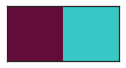

In [48]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [53]:
#define labels and where they should go
centroide1, centroide2 = converte_individuos(top3[0])

In [54]:
clusters_1 = []
clusters_2 = []
for i in dataset1:
    c1 = distanciaEuclidiana(i, centroide1)
    c2 = distanciaEuclidiana(i, centroide2)
        
    if c1 < c2:
        clusters_1.append(i)
    else:
        clusters_2.append(i)

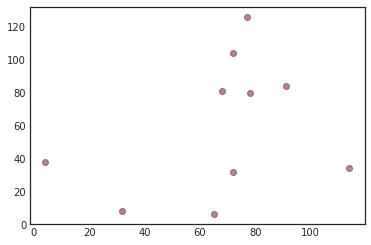

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Create data

x_list = []
y_list = []
for i in dataset1:
    x, y = i
    x_list.append(x)
    y_list.append(y)

colors = ("red", "green")

plt.scatter(x_list, y_list, alpha=0.5)
plt.show()